<a href="https://colab.research.google.com/github/MUbarak123-56/fast-ai/blob/master/chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
import re

In [7]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [8]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
(path/"images").ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_75.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_68.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_81.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_103.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_145.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/leonberger_200.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_90.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_169.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_145.jpg')...]

In [10]:
fname = (path/"images").ls()[0]

In [19]:
fname.name

'beagle_75.jpg'

In [12]:
re.findall(r'(.+)_\d+.jpg$',fname.name)

['beagle']

In [13]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files, 
                 splitter = RandomSplitter(seed = 42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale = 0.75))

dls = pets.dataloaders(path/"images")

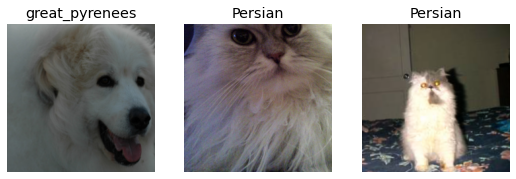

In [14]:
dls.show_batch(nrows = 1, ncols = 3)

In [15]:
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_156.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x352
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_156.jpg
    applying partial gives
      Russian_Blue
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(9)

Final sample: (PILImage mode=RGB size=500x352, TensorCategory(9))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up afte

In [16]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.515812,0.374519,0.121786,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.485402,0.336230,0.110961,01:33
1,0.317342,0.261879,0.076455,01:28


In [17]:
X, y = dls.one_batch()

In [18]:
y

TensorCategory([12, 20, 36, 23, 24, 30, 23, 10, 11,  9, 16, 34, 11,  6, 12, 27, 15,  4, 15, 31,  8,  3, 27,  6,  2, 14,  2,  9, 31, 13,  7, 16, 25, 28, 32, 25, 21, 19, 32,  7, 29,  8, 33, 35, 17, 21,
                29,  0,  1, 22, 36, 32, 26,  9, 19,  5, 26, 22,  9,  7, 20, 36, 24, 14], device='cuda:0')

In [20]:
preds, _ = learn.get_preds(dl = [(X,y)])
preds[0]

TensorBase([1.0942e-06, 1.3779e-07, 3.9980e-08, 2.0864e-08, 3.4996e-05, 2.9202e-06, 7.8422e-08, 8.2886e-08, 1.0721e-07, 8.8841e-07, 3.6929e-08, 2.8352e-04, 9.9829e-01, 1.1939e-04, 8.9603e-06,
            1.5802e-05, 1.1098e-03, 2.3456e-08, 9.5104e-08, 1.2351e-06, 1.5069e-06, 5.4577e-07, 2.0592e-07, 2.0765e-08, 1.2007e-06, 4.8995e-08, 2.2641e-07, 2.0367e-07, 8.3041e-08, 1.0777e-06,
            5.8157e-06, 3.3709e-07, 3.1686e-07, 2.2472e-07, 5.1288e-05, 7.1019e-05, 6.6736e-07])

In [21]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

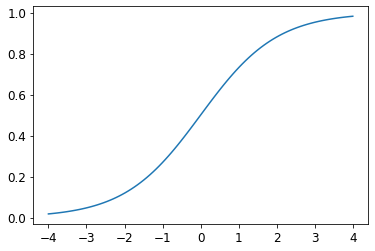

In [22]:
plot_function(torch.sigmoid, min = -4, max = 4)

In [23]:
acts = torch.randn((6,2))*2
acts

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

In [24]:
acts.sigmoid()

tensor([[0.0603, 0.7846],
        [0.0347, 0.3391],
        [0.2179, 0.7787],
        [0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099]])

In [25]:
(acts[:,0] - acts[:,1]).sigmoid()

tensor([0.0173, 0.0654, 0.0734, 0.2011, 0.8459, 0.9867])

In [26]:
import numpy as np

In [27]:
def softmax(x):
  return torch.exp(x)/torch.exp(x).sum(dim = 1, keepdim = True)

In [28]:
sm_acts = torch.softmax(acts, dim = 1)
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [29]:
targ = tensor([0,1,0,1,1,0])

In [30]:
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [31]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.0173, 0.9346, 0.0734, 0.7989, 0.1541, 0.9867])

In [32]:
-sm_acts[idx, targ]

tensor([-0.0173, -0.9346, -0.0734, -0.7989, -0.1541, -0.9867])

In [33]:
F.nll_loss(sm_acts, targ, reduction = 'none')

tensor([-0.0173, -0.9346, -0.0734, -0.7989, -0.1541, -0.9867])

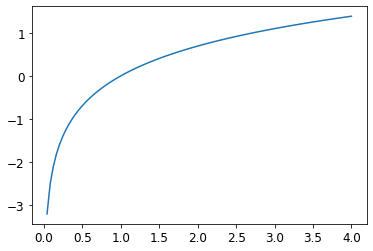

In [34]:
plot_function(torch.log, min = 0, max = 4)

In [35]:
loss_func = nn.CrossEntropyLoss()

In [36]:
loss_func(acts, targ)

tensor(1.4743)

In [38]:
F.cross_entropy(acts, targ)

tensor(1.4743)

In [37]:
nn.CrossEntropyLoss(reduction = 'none')(acts, targ)

tensor([4.0573, 0.0677, 2.6122, 0.2245, 1.8704, 0.0134])

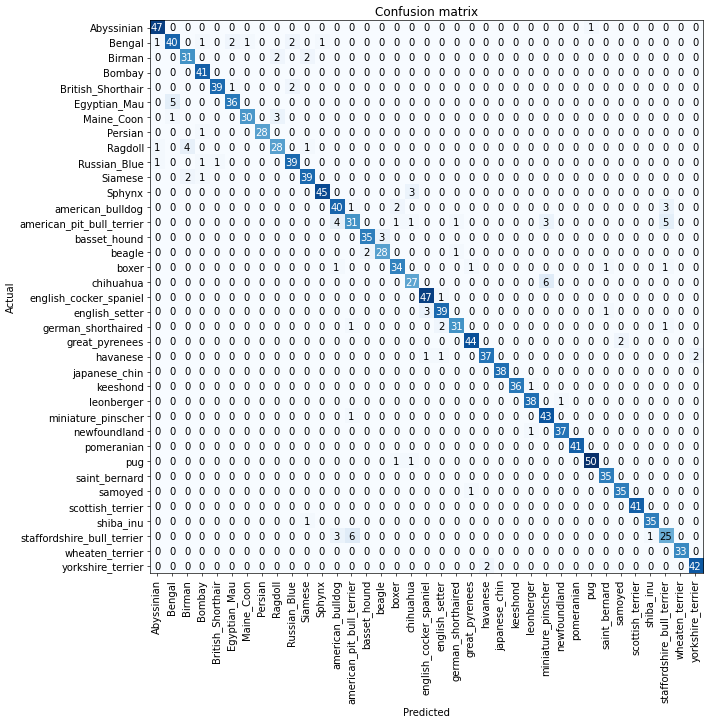

In [39]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (12,12), dpi = 60)

In [40]:
interp.most_confused(min_val = 5)

[('chihuahua', 'miniature_pinscher', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

In [41]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(1, base_lr = 0.1)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.604244,4.352382,0.462788,01:25


epoch,train_loss,valid_loss,error_rate,time
0,3.703019,2.062126,0.556157,01:30


/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


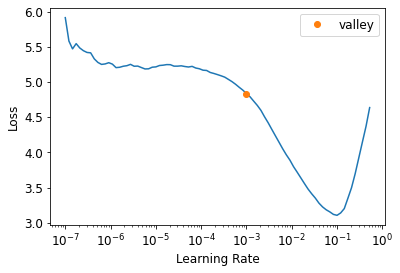

In [45]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
lr = learn.lr_find()

In [46]:
lr

SuggestedLRs(valley=0.0010000000474974513)

In [49]:
print("Minimum/10: %.5e"%(lr))

Minimum/10: 1.00000e-03


In [50]:
learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2,base_lr = 3e-3)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.287325,0.342492,0.114344,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.544453,0.451302,0.130582,01:30
1,0.337819,0.271248,0.088633,01:29


In [51]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.169502,0.353175,0.109608,01:31
1,0.508161,0.291741,0.096076,01:26
2,0.315868,0.258911,0.082544,01:31


In [52]:
learn.unfreeze()

SuggestedLRs(valley=2.511886486900039e-05)

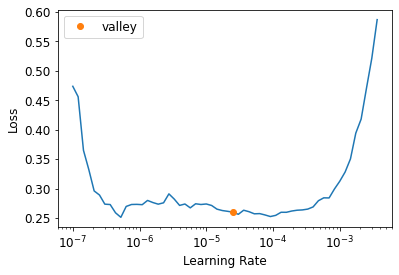

In [53]:
learn.lr_find()

In [54]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.241729,0.249086,0.076455,01:28
1,0.241037,0.241126,0.073748,01:29
2,0.221470,0.230026,0.073748,01:26
3,0.205774,0.227812,0.067659,01:27
4,0.183666,0.222150,0.073072,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.241729,0.249086,0.076455,01:28
1,0.241037,0.241126,0.073748,01:29
2,0.221470,0.230026,0.073748,01:26
3,0.205774,0.227812,0.067659,01:27
4,0.183666,0.222150,0.073072,01:26
5,0.180190,0.221582,0.069012,01:27


In [55]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(6, lr_max=slice(1e-6,1e-4))

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.157170,0.333604,0.101489,01:26
1,0.534847,0.299918,0.100135,01:30
2,0.314411,0.256266,0.079161,01:27


epoch,train_loss,valid_loss,error_rate,time
0,0.268023,0.250169,0.077131,01:27
1,0.249252,0.243569,0.073748,01:28
2,0.205130,0.227228,0.071719,01:27
3,0.191102,0.226464,0.069689,01:29
4,0.175966,0.223989,0.071042,01:28
5,0.167499,0.224514,0.069012,01:30


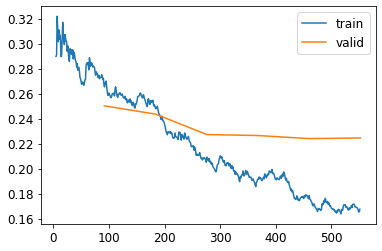

In [56]:
learn.recorder.plot_loss()

In [57]:
from fastai.callback.fp16 import *
learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.263170,0.296802,0.098106,01:21
1,0.554362,0.321971,0.101489,01:24
2,0.417136,0.314550,0.089310,01:20


epoch,train_loss,valid_loss,error_rate,time
0,0.265475,0.264275,0.090663,01:25
1,0.327759,0.390536,0.104871,01:22
2,0.240706,0.313895,0.093369,01:23
3,0.164395,0.279592,0.074425,01:25
4,0.097150,0.250334,0.068336,01:24


epoch,train_loss,valid_loss,error_rate,time
0,0.265475,0.264275,0.090663,01:25
1,0.327759,0.390536,0.104871,01:22
2,0.240706,0.313895,0.093369,01:23
3,0.164395,0.279592,0.074425,01:25
4,0.097150,0.250334,0.068336,01:24
5,0.056119,0.240896,0.068336,01:25
